In [1]:
# Cell 1: Import required libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt
import numpy as np

print("🔮 Basic Quantum Gate Applier - X and H Gates")
print("=" * 50)

🔮 Basic Quantum Gate Applier - X and H Gates


In [2]:
# Cell 2: Basic X Gate (Pauli-X / NOT Gate)
print("\n1. X GATE (Pauli-X / NOT Gate)")
print("-" * 30)

# Create a quantum circuit with 1 qubit and 1 classical bit
qc_x = QuantumCircuit(1, 1)

# Initial state |0⟩
print("Initial state: |0⟩")

# Apply X gate (flips |0⟩ to |1⟩)
qc_x.x(0)

# Measure the qubit
qc_x.measure(0, 0)

# Draw the circuit
print("Circuit:")
print(qc_x.draw())

# Simulate the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc_x, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts()

print(f"Measurement results: {counts}")
print("X gate flipped |0⟩ to |1⟩")


1. X GATE (Pauli-X / NOT Gate)
------------------------------
Initial state: |0⟩
Circuit:
     ┌───┐┌─┐
  q: ┤ X ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 
Measurement results: {'1': 1000}
X gate flipped |0⟩ to |1⟩


In [3]:
# Cell 3: Basic H Gate (Hadamard Gate)
print("\n2. H GATE (Hadamard Gate)")
print("-" * 30)

# Create quantum circuit
qc_h = QuantumCircuit(1, 1)

# Initial state |0⟩
print("Initial state: |0⟩")

# Apply H gate (creates superposition: |0⟩ → (|0⟩ + |1⟩)/√2)
qc_h.h(0)

# Measure the qubit
qc_h.measure(0, 0)

# Draw the circuit
print("Circuit:")
print(qc_h.draw())

# Simulate the circuit
compiled_circuit = transpile(qc_h, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts()

print(f"Measurement results: {counts}")
print("H gate created superposition - approximately 50% |0⟩ and 50% |1⟩")




2. H GATE (Hadamard Gate)
------------------------------
Initial state: |0⟩
Circuit:
     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 
Measurement results: {'1': 506, '0': 494}
H gate created superposition - approximately 50% |0⟩ and 50% |1⟩


In [4]:
# Cell 4: Combined X and H Gates
print("\n3. X GATE followed by H GATE")
print("-" * 30)

qc_xh = QuantumCircuit(1, 1)

# Initial state |0⟩
print("Initial state: |0⟩")

# Apply X then H
qc_xh.x(0)  # |0⟩ → |1⟩
qc_xh.h(0)  # |1⟩ → (|0⟩ - |1⟩)/√2

# Measure
qc_xh.measure(0, 0)

print("Circuit:")
print(qc_xh.draw())

# Simulate
compiled_circuit = transpile(qc_xh, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts()

print(f"Measurement results: {counts}")
print("X then H creates different superposition state")


3. X GATE followed by H GATE
------------------------------
Initial state: |0⟩
Circuit:
     ┌───┐┌───┐┌─┐
  q: ┤ X ├┤ H ├┤M├
     └───┘└───┘└╥┘
c: 1/═══════════╩═
                0 
Measurement results: {'0': 516, '1': 484}
X then H creates different superposition state


In [5]:
# Cell 5: H followed by X Gates
print("\n4. H GATE followed by X GATE")
print("-" * 30)

qc_hx = QuantumCircuit(1, 1)

# Initial state |0⟩
print("Initial state: |0⟩")

# Apply H then X
qc_hx.h(0)  # |0⟩ → (|0⟩ + |1⟩)/√2
qc_hx.x(0)  # (|0⟩ + |1⟩)/√2 → (|1⟩ + |0⟩)/√2

# Measure
qc_hx.measure(0, 0)

print("Circuit:")
print(qc_hx.draw())

# Simulate
compiled_circuit = transpile(qc_hx, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts()

print(f"Measurement results: {counts}")
print("H then X also creates equal superposition")



4. H GATE followed by X GATE
------------------------------
Initial state: |0⟩
Circuit:
     ┌───┐┌───┐┌─┐
  q: ┤ H ├┤ X ├┤M├
     └───┘└───┘└╥┘
c: 1/═══════════╩═
                0 
Measurement results: {'0': 498, '1': 502}
H then X also creates equal superposition


In [6]:
# Cell 6: Multiple Qubit Example
print("\n5. MULTIPLE QUBITS - Different Gate Combinations")
print("-" * 45)

qc_multi = QuantumCircuit(3, 3)

# Qubit 0: H gate only
qc_multi.h(0)

# Qubit 1: X gate only
qc_multi.x(1)

# Qubit 2: X then H
qc_multi.x(2)
qc_multi.h(2)

# Measure all qubits
qc_multi.measure([0, 1, 2], [0, 1, 2])

print("Circuit:")
print(qc_multi.draw())

# Simulate
compiled_circuit = transpile(qc_multi, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts()

print(f"Measurement results (first 10):")
for state, count in list(counts.items())[:10]:
    print(f"  |{state}⟩: {count} times")


5. MULTIPLE QUBITS - Different Gate Combinations
---------------------------------------------
Circuit:
     ┌───┐     ┌─┐      
q_0: ┤ H ├─────┤M├──────
     ├───┤     └╥┘┌─┐   
q_1: ┤ X ├──────╫─┤M├───
     ├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘ ║  ║ └╥┘
c: 3/═══════════╩══╩══╩═
                0  1  2 
Measurement results (first 10):
  |111⟩: 215 times
  |011⟩: 242 times
  |010⟩: 275 times
  |110⟩: 268 times


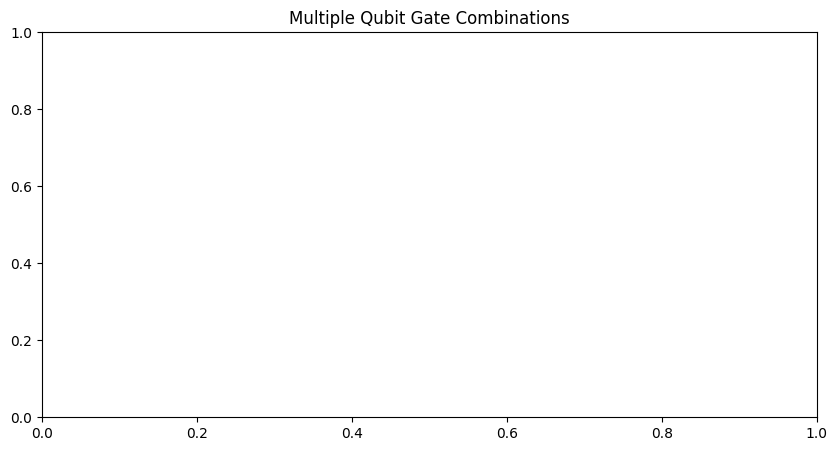

In [7]:
# Cell 7: Plot results for multiple qubits
# Plot results
plt.figure(figsize=(10, 5))
plot_histogram(counts)
plt.title("Multiple Qubit Gate Combinations")
plt.show()

In [8]:
# Cell 8: Statevector Visualization Setup
print("\n6. STATEVECTOR VISUALIZATION")
print("-" * 30)

from qiskit.quantum_info import Statevector

# Create different circuits for statevector analysis
circuits = []

# Circuit 1: |0⟩ state
qc1 = QuantumCircuit(1)
circuits.append(("|0⟩ State", qc1))

# Circuit 2: X|0⟩ = |1⟩
qc2 = QuantumCircuit(1)
qc2.x(0)
circuits.append(("X|0⟩ = |1⟩", qc2))

# Circuit 3: H|0⟩ = (|0⟩+|1⟩)/√2
qc3 = QuantumCircuit(1)
qc3.h(0)
circuits.append(("H|0⟩ = (|0⟩+|1⟩)/√2", qc3))

# Circuit 4: H|1⟩ = (|0⟩-|1⟩)/√2
qc4 = QuantumCircuit(1)
qc4.x(0)
qc4.h(0)
circuits.append(("H|1⟩ = (|0⟩-|1⟩)/√2", qc4))





6. STATEVECTOR VISUALIZATION
------------------------------


In [9]:
# Cell 9: Display Statevector Results
# Calculate and display statevectors
print("Statevector Analysis:")
print("-" * 20)
for name, circuit in circuits:
    state = Statevector(circuit)
    print(f"\n{name}:")
    print(f"  Statevector: {state}")
    print(f"  Probabilities: |0⟩: {abs(state[0])**2:.3f}, |1⟩: {abs(state[1])**2:.3f}")



Statevector Analysis:
--------------------

|0⟩ State:
  Statevector: Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
  Probabilities: |0⟩: 1.000, |1⟩: 0.000

X|0⟩ = |1⟩:
  Statevector: Statevector([0.+0.j, 1.+0.j],
            dims=(2,))
  Probabilities: |0⟩: 0.000, |1⟩: 1.000

H|0⟩ = (|0⟩+|1⟩)/√2:
  Statevector: Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
  Probabilities: |0⟩: 0.500, |1⟩: 0.500

H|1⟩ = (|0⟩-|1⟩)/√2:
  Statevector: Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))
  Probabilities: |0⟩: 0.500, |1⟩: 0.500


In [10]:

# Cell 10: Interactive Gate Application Function
print("\n7. INTERACTIVE GATE APPLIER")
print("-" * 30)

def apply_gates(gate_sequence, shots=1000):
    """
    Apply a sequence of gates to a single qubit and measure results
    
    Parameters:
    gate_sequence: list of gates to apply ('x', 'h', or combinations)
    shots: number of simulation shots
    """
    qc = QuantumCircuit(1, 1)
    
    print(f"Gate sequence: {gate_sequence}")
    print("Initial state: |0⟩")
    
    # Apply gates in sequence
    for gate in gate_sequence:
        if gate.lower() == 'x':
            qc.x(0)
            print("Applied X gate")
        elif gate.lower() == 'h':
            qc.h(0)
            print("Applied H gate")
        else:
            print(f"Unknown gate: {gate}")
    
    # Measure
    qc.measure(0, 0)
    
    # Simulate
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit, shots=shots)
    result = job.result()
    counts = result.get_counts()
    
    print(f"\nFinal measurement results: {counts}")
    print(f"Circuit:\n{qc.draw()}")
    
    return counts


7. INTERACTIVE GATE APPLIER
------------------------------


In [11]:

# Cell 11: Test Interactive Function
print("Testing different gate sequences:")
print("=" * 40)

# Test 1: X only
print("\nTest 1 - X gate:")
apply_gates(['x'])

# Test 2: H only  
print("\nTest 2 - H gate:")
apply_gates(['h'])

# Test 3: X then H
print("\nTest 3 - X then H:")
apply_gates(['x', 'h'])

# Test 4: H then X
print("\nTest 4 - H then X:")
apply_gates(['h', 'x'])


Testing different gate sequences:

Test 1 - X gate:
Gate sequence: ['x']
Initial state: |0⟩
Applied X gate

Final measurement results: {'1': 1000}
Circuit:
     ┌───┐┌─┐
  q: ┤ X ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 

Test 2 - H gate:
Gate sequence: ['h']
Initial state: |0⟩
Applied H gate

Final measurement results: {'1': 508, '0': 492}
Circuit:
     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 

Test 3 - X then H:
Gate sequence: ['x', 'h']
Initial state: |0⟩
Applied X gate
Applied H gate

Final measurement results: {'0': 497, '1': 503}
Circuit:
     ┌───┐┌───┐┌─┐
  q: ┤ X ├┤ H ├┤M├
     └───┘└───┘└╥┘
c: 1/═══════════╩═
                0 

Test 4 - H then X:
Gate sequence: ['h', 'x']
Initial state: |0⟩
Applied H gate
Applied X gate

Final measurement results: {'0': 517, '1': 483}
Circuit:
     ┌───┐┌───┐┌─┐
  q: ┤ H ├┤ X ├┤M├
     └───┘└───┘└╥┘
c: 1/═══════════╩═
                0 


{'0': 517, '1': 483}

In [12]:
# Cell 12: Test More Complex Sequences
# Test 5: Multiple gates
print("\nTest 5 - H then X then H:")
apply_gates(['h', 'x', 'h'])

# Test 6: Double H (should return to original state)
print("\nTest 6 - H then H (should return to |0⟩):")
apply_gates(['h', 'h'])

# Test 7: Complex sequence
print("\nTest 7 - Complex sequence H,X,H,X:")
apply_gates(['h', 'x', 'h', 'x'])


Test 5 - H then X then H:
Gate sequence: ['h', 'x', 'h']
Initial state: |0⟩
Applied H gate
Applied X gate
Applied H gate

Final measurement results: {'0': 1000}
Circuit:
     ┌───┐┌───┐┌───┐┌─┐
  q: ┤ H ├┤ X ├┤ H ├┤M├
     └───┘└───┘└───┘└╥┘
c: 1/════════════════╩═
                     0 

Test 6 - H then H (should return to |0⟩):
Gate sequence: ['h', 'h']
Initial state: |0⟩
Applied H gate
Applied H gate

Final measurement results: {'0': 1000}
Circuit:
     ┌───┐┌───┐┌─┐
  q: ┤ H ├┤ H ├┤M├
     └───┘└───┘└╥┘
c: 1/═══════════╩═
                0 

Test 7 - Complex sequence H,X,H,X:
Gate sequence: ['h', 'x', 'h', 'x']
Initial state: |0⟩
Applied H gate
Applied X gate
Applied H gate
Applied X gate

Final measurement results: {'1': 1000}
Circuit:
     ┌───┐┌───┐┌───┐┌───┐┌─┐
  q: ┤ H ├┤ X ├┤ H ├┤ X ├┤M├
     └───┘└───┘└───┘└───┘└╥┘
c: 1/═════════════════════╩═
                          0 


{'1': 1000}

In [13]:
# Cell 13: Summary and Key Concepts
# Summary of gate operations
print("\n" + "="*60)
print("SUMMARY OF GATE OPERATIONS")
print("="*60)

summary_data = {
    "X Gate": {
        "Effect": "Bit flip (Pauli-X)",
        "|0⟩ →": "|1⟩",
        "|1⟩ →": "|0⟩",
        "Matrix": "[[0, 1], [1, 0]]"
    },
    "H Gate": {
        "Effect": "Hadamard (creates superposition)",
        "|0⟩ →": "(|0⟩ + |1⟩)/√2",
        "|1⟩ →": "(|0⟩ - |1⟩)/√2", 
        "Matrix": "[[1/√2, 1/√2], [1/√2, -1/√2]]"
    }
}

for gate, info in summary_data.items():
    print(f"\n{gate}:")
    for key, value in info.items():
        print(f"  {key}: {value}")

print("\n" + "="*60)
print("Key Observations:")
print("• X gate flips the state (|0⟩ ↔ |1⟩)")
print("• H gate creates equal superposition when applied to |0⟩ or |1⟩")
print("• Order matters: X then H gives different results than H then X")
print("• Multiple H gates can cancel each other (H² = I)")
print("="*60)



SUMMARY OF GATE OPERATIONS

X Gate:
  Effect: Bit flip (Pauli-X)
  |0⟩ →: |1⟩
  |1⟩ →: |0⟩
  Matrix: [[0, 1], [1, 0]]

H Gate:
  Effect: Hadamard (creates superposition)
  |0⟩ →: (|0⟩ + |1⟩)/√2
  |1⟩ →: (|0⟩ - |1⟩)/√2
  Matrix: [[1/√2, 1/√2], [1/√2, -1/√2]]

Key Observations:
• X gate flips the state (|0⟩ ↔ |1⟩)
• H gate creates equal superposition when applied to |0⟩ or |1⟩
• Order matters: X then H gives different results than H then X
• Multiple H gates can cancel each other (H² = I)


In [14]:
# Cell 14: Bonus - Bloch Sphere Visualization (optional)
print("\n8. BLOCH SPHERE VISUALIZATION (Optional)")
print("-" * 45)

try:
    from qiskit.visualization import plot_bloch_vector
    from qiskit.quantum_info import Statevector
    
    # Create states for visualization
    states = [
        ("|0⟩ State", QuantumCircuit(1)),
        ("|1⟩ State (X|0⟩)", QuantumCircuit(1)).x(0),
        ("H|0⟩ State", QuantumCircuit(1)).h(0),
        ("H|1⟩ State", QuantumCircuit(1)).x(0).h(0)
    ]
    
    print("Bloch sphere representations would show:")
    print("• |0⟩: Vector pointing to north pole")
    print("• |1⟩: Vector pointing to south pole") 
    print("• H|0⟩: Vector pointing to +x axis")
    print("• H|1⟩: Vector pointing to -x axis")
    
except ImportError:
    print("Bloch sphere visualization requires additional dependencies")
    print("Run: pip install qiskit[visualization]")


8. BLOCH SPHERE VISUALIZATION (Optional)
---------------------------------------------


AttributeError: 'tuple' object has no attribute 'x'